# MNIST

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 185, 159, 151, 60, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 222, 254, 254, 254, 254, 241, 198, 198, 198, 198, 198, 198, 198, 198, 170, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 67, 114, 72, 114, 163, 227, 254, 225, 254, 254, 254, 250, 229, 254, 254, 140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 66, 14, 67, 67, 67, 59, 21, 236, 254, 106, 0, 0, 0, 

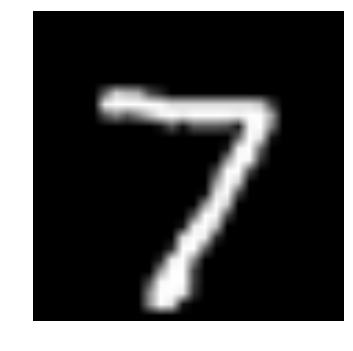

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
image1=[]
mnistData = open('/root/examples/data/mnist/t10k-images-idx3-ubyte','rb')
mnistData.seek(0,0)
mnistData.read(16)
for i in range(0,28*28):
    b=int(mnistData.read(1).encode('hex'),16)
    image1.append(b)
    
print(image1)
arr = np.array(image1)
plt.imshow(arr.reshape((28, 28)),cmap=cm.Greys_r)
plt.axis('off')
plt.show()

## Convert to CSV

[MNIST in CSV](http://pjreddie.com/projects/mnist-in-csv/)

In [21]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("/root/examples/data/mnist/train-images-idx3-ubyte", "/root/examples/data/mnist/train-labels-idx1-ubyte",
        "/root/examples/data/mnist/mnist_train.csv", 60000)
convert("/root/examples/data/mnist/t10k-images-idx3-ubyte", "/root/examples/data/mnist/t10k-labels-idx1-ubyte",
        "/root/examples/data/mnist/mnist_test.csv", 10000)

### Read data

[MSDN: Data Processing and Machine Learning on Spark](https://msdn.microsoft.com/en-us/magazine/mt694087.aspx?f=255&MSPPError=-2147217396)

In [81]:
fileNameTrain = '/root/examples/data/mnist/mnist_train.csv'
fileNameTest = '/root/examples/data/mnist/mnist_test.csv'
mnist_train = sc.textFile(fileNameTrain)
mnist_test = sc.textFile(fileNameTest)

In [82]:
def parsePoint(line):
  #Parse a line of text into an MLlib LabeledPoint object
  values = line.split(',')
  values = [0 if e == '' else int(e) for e in values]
  return LabeledPoint(int(values[0]), values[1:])

In [83]:
points = mnist_train.map(parsePoint)

In [84]:
mnist_train.countByKey()

defaultdict(int,
            {u'0': 5923,
             u'1': 6742,
             u'2': 5958,
             u'3': 6131,
             u'4': 5842,
             u'5': 5421,
             u'6': 5918,
             u'7': 6265,
             u'8': 5851,
             u'9': 5949})

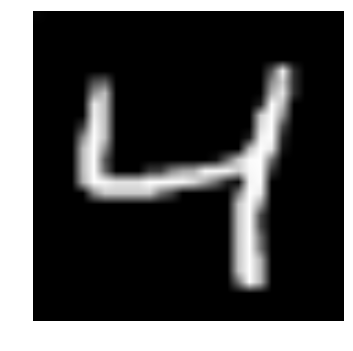

In [106]:
# Draw sample
def drawElement(dataset,sample_num):
    sample = dataset.take(sample_num)
    img = sample[sample_num-1].split(',')
    #print(len(img))
    image1=[]
    for i in range(0,28*28):
        b=int(img[i])
        image1.append(b)

    arr = np.array(image1)
    plt.imshow(arr.reshape((28, 28)),cmap=cm.Greys_r)
    plt.axis('off')
    plt.show()
    
drawElement(mnist_train,3)

In [107]:
trainingData = mnist_train.map(parsePoint)
testData = mnist_test.map(parsePoint)

In [109]:
import time
from pyspark.mllib.tree import RandomForest
depthLevel = 4
treeLevel = 3
#start timer
start_time = time.time()
#this is building a model using the Random Forest algorithm from Spark MLLib
model = RandomForest.trainClassifier(trainingData, numClasses=10, 
  categoricalFeaturesInfo={},
  numTrees=treeLevel, featureSubsetStrategy="auto",
  impurity='gini', maxDepth=depthLevel, maxBins=32) 
print("Training time --- %s seconds ---" % (time.time() - start_time))

Training time --- 28.6793658733 seconds ---


In [112]:
start_time = time.time()
#make predictions using the Machine Learning created prior
predictions = model.predict(testData.map(lambda x: x.features))
#validate predictions using the training set
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(testData.count())
print('Test Error = ' + str(testErr))
print("Prediction time --- %s seconds ---" % (time.time() - start_time))

Test Error = 0.4066
Prediction time --- 5.70749902725 seconds ---


In [113]:
bestModel = None
bestTestErr = 100
#Define a range of hyperparameters to try
maxDepths = range(4,10)
maxTrees = range(3,10)

#Loop over parameters for depth and tree level(s)
for depthLevel in maxDepths:
    for treeLevel in maxTrees:
     
        #start timer
        start_time = time.time()
        #Train RandomForest machine learning classifier
        model = RandomForest.trainClassifier(trainingData, 
            numClasses=10, categoricalFeaturesInfo={},
            numTrees=treeLevel, featureSubsetStrategy="auto",
            impurity='gini', maxDepth=depthLevel, maxBins=32)       
    
        #Make predictions using the model created above
        predictions = model.predict(testData.map(lambda x: x.features))
        #Join predictions with actual values from the data and determine the error rate
        labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
        testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(testData.count())
        #Print information about the model as we proceed with each iteration of the loop
        print ('\maxDepth = {0:.1f}, trees = {1:.1f}: trainErr = {2:.5f}'.format(depthLevel, treeLevel, testErr))
        print("Prediction time --- %s seconds ---" % (time.time() - start_time))
        if (testErr < bestTestErr):
            bestModel = model
            bestTestErr = testErr
 
print ('Best Test Error: = {0:.3f}\n'.format(bestTestErr))

\maxDepth = 4.0, trees = 3.0: trainErr = 0.44200
Prediction time --- 34.9708471298 seconds ---
\maxDepth = 4.0, trees = 4.0: trainErr = 0.39240
Prediction time --- 34.9173491001 seconds ---
\maxDepth = 4.0, trees = 5.0: trainErr = 0.33150
Prediction time --- 34.776695013 seconds ---
\maxDepth = 4.0, trees = 6.0: trainErr = 0.35460
Prediction time --- 35.2629759312 seconds ---
\maxDepth = 4.0, trees = 7.0: trainErr = 0.33590
Prediction time --- 34.9054150581 seconds ---
\maxDepth = 4.0, trees = 8.0: trainErr = 0.28210
Prediction time --- 34.2467489243 seconds ---
\maxDepth = 4.0, trees = 9.0: trainErr = 0.27890
Prediction time --- 35.7888429165 seconds ---
\maxDepth = 5.0, trees = 3.0: trainErr = 0.33390
Prediction time --- 35.4224689007 seconds ---
\maxDepth = 5.0, trees = 4.0: trainErr = 0.29390
Prediction time --- 35.0831019878 seconds ---
\maxDepth = 5.0, trees = 5.0: trainErr = 0.27450
Prediction time --- 34.2007930279 seconds ---
\maxDepth = 5.0, trees = 6.0: trainErr = 0.25440
Pr

# MLlib

http://spark.apache.org/docs/1.6.2/mllib-data-types.html

## Resilient Distributed Datasets (RDDs) 

In [1]:
# RDDs test
from pyspark.mllib.linalg.distributed import RowMatrix

# Create an RDD of vectors.
rows = sc.parallelize([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Create a RowMatrix from an RDD of vectors.
mat = RowMatrix(rows)

# Get its size.
m = mat.numRows()  # 4
n = mat.numCols()  # 3

# Get the rows as an RDD of vectors again.
rowsRDD = mat.rows

In [2]:
rowsRDD.take(1)

[DenseVector([1.0, 2.0, 3.0])]